In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


### Installing Libraries

In [2]:
!pip install chromadb
!pip install PyMuPDF
# !pip install -U langchain-community
# !pip install sentence-transformers
!pip install evaluate
!pip install smolagents
!pip install rouge_score
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 8.3 MB/s eta 0:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=421b331de3cb521a5b00f1bd285906456e664ecf7fdfc411e86ecf8dee39bd39
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

### Importing Libraries

In [3]:
import os
import glob
import fitz
import chromadb
import numpy as np
from typing import List
from sentence_transformers import SentenceTransformer
from langchain.text_splitter import RecursiveCharacterTextSplitter
from evaluate import load
import matplotlib.pyplot as plt
from smolagents.tools import Tool
from typing import Dict, List, Union
import re
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch


# RAG Pipeline

## Inititallization

In [4]:
EMBEDDING_MODEL = "all-MiniLM-L6-v2"
db_dir = "/content/drive/MyDrive/2CSI-Project_DATA/VectorDB_Embeddings"
data_dir = "/content/drive/MyDrive/Colab Notebooks/data"
results_dir = "./results"
os.makedirs(results_dir, exist_ok=True)

In [5]:
# Initialize models
embedding_model = SentenceTransformer(EMBEDDING_MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
# Initialize ChromaDB
client = chromadb.PersistentClient(path=db_dir)
collection = client.get_or_create_collection(name='ties_collection_emb', metadata={"hnsw:space": "cosine"})

## Document Processing

In [7]:

def process_scientific_text(text):
    # Remove references (e.g., [10], [15])
    text = re.sub(r'\[\d+\]', '', text)

    # Remove formulas (e.g., Lntp = ..., Lclass = ...)
    text = re.sub(r'L[a-zA-Z]+\s*=\s*[^=]+', '', text)

    # Remove table-related content (e.g., "TABLE 1. OVERVIEW OF THE DGA DATASET")
    text = re.sub(r'TABLE \d+\..*?\n', '', text, flags=re.IGNORECASE)

    # Remove numerical results (e.g., 97%, 0.7%, 1458863)
    text = re.sub(r'\b\d+%|\b\d+\.\d+%|\b\d{3,}\b', '', text)

    # Remove dataset-specific details (e.g., URLs, dataset sizes)
    text = re.sub(r'https?://[^\s]+', '', text)
    text = re.sub(r'\b\d+\s*(domains|records|samples|queries)\b', '', text, flags=re.IGNORECASE)

    # Remove lines with DGA dataset examples (e.g., zsvubwnqlefqv.com, xshellghost)
    text = re.sub(r'^\w+\s+\d+\s+[^\s]+\.[a-z]+$', '', text, flags=re.MULTILINE)

    # Remove empty lines and normalize whitespace, preserving section headings
    lines = [line.strip() for line in text.splitlines() if line.strip()]
    text = '\n'.join(lines)  # Preserve line breaks for section headings

    return text

## Chunking Document

In [8]:
# PDF processing
def extract_and_chunk_pdf(file_path, chunk_size=800, chunk_overlap=400):
    """Extracts text from a PDF and splits into chunks."""
    doc = fitz.open(file_path)
    text = "\n".join([page.get_text("text") for page in doc])

    # Extract abstract (assuming it's the first paragraph or labeled)
    abstract = text.split("\n\n")[0] if "abstract" in text.lower() else ""



    # def extract_abstract(text):
    #   """
    #   Extracts the abstract section using stricter heading detection, avoiding look-behind.
    #   """
    #   # Match 'Abstract' as a heading (e.g., start of line), followed by text,
    #   # stopping at 'Introduction' or another heading-like pattern
    #   pattern = r'^\s*abstract\s*[\n:\-]*\s*(.*?)(?=\n\s*(\d{0,2}\.?\s*)?introduction\b|\n\s*[A-Z][^\n]{0,50}\n)'
    #   match = re.search(pattern, text, flags=re.IGNORECASE | re.DOTALL | re.MULTILINE)

    #   if match:
    #       abstract = match.group(1).strip()
    #       abstract = re.sub(r'\s+', ' ', abstract)  # Normalize whitespace
    #       return abstract
    #   return None

    # abstract = extract_abstract(text)
    # Chunk text
    text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
        chunk_size=chunk_size, chunk_overlap=chunk_overlap
    )
    chunks = text_splitter.split_text(text)
    chunks = [process_scientific_text(chunk) for chunk in chunks]
    return chunks, abstract

def compute_embeddings(chunks):
    """ Computes embeddings for text chunks """
    return embedding_model.encode(chunks, convert_to_numpy=True)

def store_in_vector_db(chunks, file_path):
    """Stores chunks and embeddings in ChromaDB."""
    doc_id = os.path.basename(file_path)
    embeddings = compute_embeddings(chunks)

    for i, (chunk, embedding) in enumerate(zip(chunks, embeddings)):
        collection.add(
            ids=[f"{doc_id}_chunk_{i}"],
            documents=[chunk],
            embeddings=[embedding.tolist()],
            metadatas=[{"source": doc_id, "chunk_id": i}]
        )

    return len(chunks)

In [9]:
chunks, abstract = extract_and_chunk_pdf(os.path.join(data_dir, "A Framework for Fine-Tuning LLMs using Heterogeneo.pdf"))

In [10]:
print(chunks[0])

A Framework for Fine-Tuning LLMs using Heterogeneous Feedback
Ryan Aponte 1, Ryan A. Rossi 2, Shunan Guo2, Franck Dernoncourt2,
Tong Yu2, Xiang Chen2, Subrata Mitra2, Nedim Lipka 2
1Carnegie Mellon University, 2Adobe Research
Abstract
Large language models (LLMs) have been
applied to a wide range of tasks, including
text summarization, web navigation, and chat-
bots. They have benefitted from supervised
fine-tuning (SFT) and reinforcement learning
from human feedback (RLHF) following an un-
supervised pretraining. These datasets can be
difficult to collect, limited in scope, and vary in
sample quality. Additionally, datasets can vary
extensively in supervision format, from numer-
ical to binary as well as multi-dimensional with
many different values. We present a framework
for fine-tuning LLMs using heterogeneous feed-
back, which has two main components. First,
we combine the heterogeneous feedback data
into a single supervision format, compatible
with methods like SFT and RLHF. Next,

In [11]:
print(abstract)

A Framework for Fine-Tuning LLMs using Heterogeneous Feedback
Ryan Aponte 1, Ryan A. Rossi 2, Shunan Guo2, Franck Dernoncourt2,
Tong Yu2, Xiang Chen2, Subrata Mitra2, Nedim Lipka 2
1Carnegie Mellon University, 2Adobe Research
Abstract
Large language models (LLMs) have been
applied to a wide range of tasks, including
text summarization, web navigation, and chat-
bots. They have benefitted from supervised
fine-tuning (SFT) and reinforcement learning
from human feedback (RLHF) following an un-
supervised pretraining. These datasets can be
difficult to collect, limited in scope, and vary in
sample quality. Additionally, datasets can vary
extensively in supervision format, from numer-
ical to binary as well as multi-dimensional with
many different values. We present a framework
for fine-tuning LLMs using heterogeneous feed-
back, which has two main components. First,
we combine the heterogeneous feedback data
into a single supervision format, compatible
with methods like SFT and RLHF. Next,

In [12]:
def extract_sections(paper_text: str) -> str:
        """
        Extracts key sections from a scientific paper using regex.

        Args:
            paper_text (str): The full text of the scientific paper.

        Returns:
            str: A string containing the extracted sections formatted as "Section: Text".
        """
        sections = {}
        section_patterns = {
            "Abstract": r"(?i)^Abstract\n([\s\S]*?)(?=\n\n(?:Introduction|Methods|Results|Discussion|Conclusion|\Z))",
            "Introduction": r"(?i)^Introduction\n([\s\S]*?)(?=\n\n(?:Methods|Results|Discussion|Conclusion|\Z))",
            "Methods": r"(?i)^Methods\n([\s\S]*?)(?=\n\n(?:Results|Discussion|Conclusion|\Z))",
            "Results": r"(?i)^Results\n([\s\S]*?)(?=\n\n(?:Discussion|Conclusion|\Z))",
            "Discussion": r"(?i)^Discussion\n([\s\S]*?)(?=\n\n(?:Conclusion|\Z))",
            "Conclusion": r"(?i)^Conclusion\n([\s\S]*?)(?=\n\n|\Z)"
        }

        for section, pattern in section_patterns.items():
            match = re.search(pattern, paper_text, re.MULTILINE)
            if match:
                sections[section] = match.group(1).strip()

        if sections:
            sections_str = "\n\n".join([f"{key}:\n{value}" for key, value in sections.items()])
        else:
            sections_str = "Full Text:\n" + paper_text

        return sections_str

In [13]:
# Add this to your imports if not already there
from sklearn.metrics.pairwise import cosine_similarity

# This helper function should be defined after your embedding_model is initialized
def get_query_relevant_chunks_from_current_pdf(user_query: str,
                                               doc_chunks: List[str],
                                               doc_chunk_embeddings: np.ndarray, # Embeddings of doc_chunks
                                               embedding_model_instance, # Pass your initialized SentenceTransformer
                                               top_k: int = 3) -> List[str]:
    """
    Retrieves top_k chunks from doc_chunks most relevant to the user_query.
    Operates in-memory on the chunks and embeddings of the current document.
    """
    if not doc_chunks or doc_chunk_embeddings.shape[0] == 0:
        return []

    query_embedding = embedding_model_instance.encode(user_query, convert_to_numpy=True)

    # Ensure embeddings are 2D for cosine_similarity
    if query_embedding.ndim == 1:
        query_embedding = query_embedding.reshape(1, -1)
    # doc_chunk_embeddings should already be 2D if from compute_embeddings

    if doc_chunk_embeddings.ndim == 1: # Should only happen if compute_embeddings returned a flat array for a single chunk
        if len(doc_chunks) == 1:
             doc_chunk_embeddings = doc_chunk_embeddings.reshape(1, -1)
        else: # Should not happen
            print("Warning: doc_chunk_embeddings is 1D for multiple chunks. This is unexpected.")
            return []


    # Calculate similarities
    sim_scores = cosine_similarity(query_embedding, doc_chunk_embeddings)[0]

    # Get top_k indices
    # Ensure we don't request more chunks than available
    actual_top_k = min(top_k, len(doc_chunks))
    if actual_top_k == 0:
        return []

    # Argsort sorts in ascending order, so we take the last 'actual_top_k' elements after reversing
    top_indices = np.argsort(sim_scores)[-actual_top_k:][::-1]

    return [doc_chunks[i] for i in top_indices]

In [14]:
def retrieve_similar_chunks(embeddings: np.ndarray, sections: str, top_k: int = 5) -> List[str]:
        """Retrieve top-k similar chunks from ChromaDB by matching each chunk separately."""

        client = chromadb.PersistentClient(path=db_dir)
        collection = client.get_or_create_collection(name='ties_collection_emb', metadata={"hnsw:space": "cosine"})
        doc_embedding = np.mean(embeddings, axis=0).tolist()
        results = collection.query(query_embeddings=[doc_embedding], n_results=top_k)
        chunks = results["documents"][0] if results["documents"] else []

        # Prioritize chunks from Abstract and Conclusion
        prioritized = []
        sections_lower = sections.lower()
        for chunk in chunks:
            if any(section in chunk.lower() for section in ["abstract", "conclusion"]) or any(section in sections_lower for section in ["abstract", "conclusion"]):
                prioritized.insert(0, chunk)
            else:
                prioritized.append(chunk)

        return prioritized[:top_k]


In [15]:
doc = fitz.open(data_dir + "/A Framework for Fine-Tuning LLMs using Heterogeneo.pdf")
text = "\n".join([page.get_text("text") for page in doc])
sections = extract_sections(text)
a=retrieve_similar_chunks(compute_embeddings(chunks),sections, top_k=5)
print(a[0:2])

['Stoica, and Eric P. Xing. 2023. Vicuna: An open-\nsource chatbot impressing gpt-4 with 90%* chatgpt\nquality.\nAakanksha Chowdhery, Sharan Narang, Jacob Devlin,\nMaarten Bosma, Gaurav Mishra, Adam Roberts,\nPaul Barham, Hyung Won Chung, Charles Sutton,\nSebastian Gehrmann, et al. 2022. Palm: Scaling\nlanguage modeling with pathways. arXiv preprint\narXiv:2204.02311.\nEdward J Hu, Yelong Shen, Phillip Wallis, Zeyuan\nAllen-Zhu, Yuanzhi Li, Shean Wang, Lu Wang,\nand Weizhu Chen. 2021. Lora: Low-rank adap-\ntation of large language models. arXiv preprint\narXiv:2106.09685.\nPo-Nien Kung, Fan Yin, Di Wu, Kai-Wei Chang, and\nNanyun Peng. 2023. Active instruction tuning:\nImproving cross-task generalization by training on\nprompt sensitive tasks. Preprint, arXiv:2311.00288.\nAndreas Köpf, Yannic Kilcher, Dimitri von Rütte,\nSotiris Anagnostidis, Zhi-Rui Tam, Keith Stevens,\nAbdullah Barhoum, Nguyen Minh Duc, Oliver\nStanley, Richárd Nagyfi, Shahul ES, Sameer Suri,\nDavid Glushkov, Arnav Da

## Baseline : T5-Small summarization

In [16]:
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")

def baseline_model(pdf_path):
    """Baseline: Summarizes PDF chunks without RAG using T5-small."""
    pdf_chunks = extract_and_chunk_pdf(pdf_path)[0]
    context = " ".join(pdf_chunks)

    # T5-friendly format
    prompt = f"summarize: {context}"

    # Tokenize and summarize
    inputs = t5_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = t5_model.generate(
        inputs["input_ids"],
        max_length=200,
        min_length=50,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )
    summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [17]:
summary = baseline_model(os.path.join(data_dir, "2488552.pdf"))
print(summary)

rebalancing is similar to starting with a buy and hold portfolio and adding a short straddle on the relative value of the portfolio assets. the option-like payoff to rebalancing induces negative convexity by magnifying drawdowns when there are pronounced divergences in asset returns. the expected return from rebalancing is compensation for this extra risk.


## RAG Summarization

In [18]:
# Ensure t5_tokenizer and t5_model are loaded globally ONCE
# t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
# t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")

def classical_rag(pdf_path, user_query):
    """Classical RAG using T5-small: retrieves relevant chunks and summarizes them."""
    pdf_chunks, _ = extract_and_chunk_pdf(pdf_path)
    if not pdf_chunks:
        print(f"Warning: No chunks extracted from {pdf_path} for classical_rag.")
        # Fallback or error handling
        prompt = f"summarize: {user_query} (No document context available)"
        inputs = t5_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
        summary_ids = t5_model.generate(inputs["input_ids"], max_length=150, min_length=30, early_stopping=True)
        return t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    pdf_chunk_embeddings = compute_embeddings(pdf_chunks)

    # NEW: Use query-specific retrieval for chunks from the current PDF
    retrieved_query_specific_chunks = get_query_relevant_chunks_from_current_pdf(
        user_query,
        pdf_chunks,
        pdf_chunk_embeddings,
        embedding_model, # Pass the initialized embedding_model
        top_k=3 # Retrieve top 3 query-relevant chunks
    )

    # General document context (e.g., first few chunks, or thinned context)
    # Consider if this is always needed or how much of it.
    general_pdf_context = " ".join(pdf_chunks[:2]) # Example: first 2 chunks

    retrieved_context_str = " ".join(retrieved_query_specific_chunks)
    if not retrieved_context_str.strip():
        retrieved_context_str = "No specific information found for the query in the document."

    # Build T5-style prompt
    combined_input = (
        f"Based on the following information from a scientific paper, answer the question. "
        f"Question: {user_query}\n\n"
        f"Relevant Excerpts for the Question:\n{retrieved_context_str}\n\n"
        f"General Overview from Document Start:\n{general_pdf_context}\n\n"
        f"Answer concisely: "
    )
    # print(f"\n古典RAG Prompt Word Count: {len(combined_input.split())}")

    inputs = t5_tokenizer(combined_input, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = t5_model.generate(
        inputs["input_ids"],
        max_length=200,
        min_length=50,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )
    summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [19]:
rag_summary = classical_rag(os.path.join(data_dir, "2488552.pdf"), "Summarize the paper in 200 words.")
print(rag_summary)

Question: Summarize the paper in 200 words. Answer the question: Summarize the paper in 200 words. - - Probability density P&L - - - - - - - Probability density Maximum drawdown Fixed-weight rebalancing + momentum Fixed-weight rebalancing + momentum Fixed-weight rebalancing + momentum 28 Electronic copy available at: Figure 16: Terminal pay-off and worst drawdowns for fixed-weight rebalancing and momentum, 1-year


# Agentic RAG Pipeline

In [20]:
# Initialize T5 model and tokenizer globally
print("Loading T5-small model and tokenizer...")
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")
# If you have a GPU and want to use it:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# t5_model.to(device)
print("T5-small model and tokenizer loaded.")

Loading T5-small model and tokenizer...
T5-small model and tokenizer loaded.


In [21]:
# Ensure t5_tokenizer and t5_model are loaded globally ONCE
# t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
# t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")

def rag_with_reasoner(user_query: str, pdf_path: str) -> str:
    """
    Agentic RAG with T5-small summarization using a custom scientific prompt.
    """
    pdf_chunks, _ = extract_and_chunk_pdf(pdf_path) # _ is abstract
    if not pdf_chunks:
        print(f"Warning: No chunks extracted from {pdf_path} for rag_with_reasoner.")
        prompt = (
            f"You are a scientific paper summarizer. Query: {user_query}\n"
            f"(No document context available to answer from)\nAnswer:"
        )
        inputs = t5_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
        summary_ids = t5_model.generate(inputs["input_ids"], max_length=150, min_length=30, early_stopping=True)
        return t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True).strip()

    pdf_chunk_embeddings = compute_embeddings(pdf_chunks)
    # sections_text = extract_sections("\\n".join(pdf_chunks)) # extract_sections might be useful for structured info

    # NEW: Use query-specific retrieval for chunks from the current PDF
    retrieved_query_specific_chunks = get_query_relevant_chunks_from_current_pdf(
        user_query,
        pdf_chunks,
        pdf_chunk_embeddings,
        embedding_model, # Pass the initialized embedding_model
        top_k=3 # Retrieve top 3 query-relevant chunks
    )

    general_pdf_context = "\\n".join(pdf_chunks[:1]) # Example: first chunk as general overview
    retrieved_text_str = "\\n".join(retrieved_query_specific_chunks)
    if not retrieved_text_str.strip():
        retrieved_text_str = "No specific information found for the query in the document."

    prompt = (
        f"You are an expert scientific paper summarizer. Your goal is to answer the user's query based *primarily* on the provided excerpts from the paper that are most relevant to the query. "
        f"Use the general overview for broader context if needed, but focus on the relevant excerpts.\n\n"
        f"User Query: {user_query}\n\n"
        f"Excerpts from the paper deemed most relevant to the query:\n{retrieved_text_str}\n\n"
        f"General Overview from the beginning of the paper:\n{general_pdf_context}\n\n"
        f"Based on this information, provide a concise and specific answer to the query: "
    )
    # print(f"\nAgentic RAG Prompt Word Count: {len(prompt.split())}")

    inputs = t5_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = t5_model.generate(
        inputs["input_ids"],
        max_length=200,
        min_length=50,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )
    summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary.strip()

In [22]:
# test rag_with_reasoner
user_query = "Summarize the paper in 200 words."
pdf_path = os.path.join(data_dir, "2488552.pdf")
agentic_summary = rag_with_reasoner(user_query, pdf_path)
print(agentic_summary)

User Query: Summarize the paper in 200 words. Use the general overview for broader context if needed. Use the general overview for broader context if needed. use the general overview for broader context if needed, but focus on the relevant excerpts.


### Testing on one File

# Evaluation

In [23]:
def evaluate_summary(generated_summary, reference_summary):
    """Evaluates a summary using ROUGE and BERTScore."""
    # Ensure summaries are not empty strings, which can cause errors with some metrics
    if not generated_summary.strip(): generated_summary = "empty generation"
    if not reference_summary.strip(): reference_summary = "empty reference"

    rouge = load("rouge")
    bertscore = load("bertscore")

    try:
        rouge_scores = rouge.compute(predictions=[generated_summary], references=[reference_summary])
        # Specify device for bertscore to potentially speed it up if GPU is available
        # and to avoid warnings if it tries to default to a non-optimal device.
        current_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        bertscore_result = bertscore.compute(predictions=[generated_summary],
                                             references=[reference_summary],
                                             lang="en",
                                             device=current_device)
        bert_f1 = bertscore_result["f1"][0] if bertscore_result and bertscore_result.get("f1") else 0.0
    except Exception as e:
        print(f"Error during metric computation: {e}")
        print(f"Generated: '{generated_summary[:100]}...'")
        print(f"Reference: '{reference_summary[:100]}...'")
        return {"rouge1": 0.0, "rougeL": 0.0, "bertscore": 0.0}


    return {
        "rouge1": rouge_scores["rouge1"] if rouge_scores else 0.0,
        "rougeL": rouge_scores["rougeL"] if rouge_scores else 0.0,
        "bertscore": bert_f1
    }

def process_and_evaluate(pdf_path, user_query):
    """Processes a PDF and evaluates Baseline, Classical-RAG, and AgenticRAG."""
    pdf_chunks, reference_summary_abstract = extract_and_chunk_pdf(pdf_path)

    if not pdf_chunks:
        print(f"Error: No chunks extracted from {pdf_path}. Cannot evaluate.")
        dummy_metrics = {"rouge1": 0.0, "rougeL": 0.0, "bertscore": 0.0}
        return {
            "Baseline": dummy_metrics.copy(),
            "Classical-RAG": dummy_metrics.copy(),
            "AgenticRAG": dummy_metrics.copy()
        }, "Error: No PDF Chunks", "Error: No PDF Chunks", "Error: No PDF Chunks"

    # Use abstract as reference. If abstract is empty or too short, use the first chunk.
    reference_for_eval = reference_summary_abstract
    if not reference_for_eval or len(reference_for_eval.split()) < 3: # Min 3 words for a meaningful reference
        print(f"Warning: Abstract is empty or too short for {pdf_path}. Using first chunk as reference.")
        reference_for_eval = pdf_chunks[0] if pdf_chunks else "No reference text available."
    if not reference_for_eval or len(reference_for_eval.split()) < 3: # Still bad
        print(f"Critical Warning: No suitable reference text found for {pdf_path}. Metrics will be unreliable.")
        reference_for_eval = "No reference text available and first chunk also unsuitable."


    baseline_summary = baseline_model(pdf_path)
    classical_summary = classical_rag(pdf_path, user_query)
    agentic_summary = rag_with_reasoner(user_query, pdf_path)

    metrics = {
        "Baseline": evaluate_summary(baseline_summary, reference_for_eval),
        "Classical-RAG": evaluate_summary(classical_summary, reference_for_eval),
        "AgenticRAG": evaluate_summary(agentic_summary, reference_for_eval)
    }
    return metrics, baseline_summary, classical_summary, agentic_summary

### Evaluate All Papers

In [24]:
def evaluate_all_papers():
    """Evaluates all PDFs in ./data and plots metrics as a bar chart."""
    pdf_files = glob.glob(os.path.join(data_dir, "*.pdf"))
    all_metrics = {}

    for pdf_path in pdf_files:
        doc_id = os.path.basename(pdf_path)
        metrics, _, _, _ = process_and_evaluate(pdf_path)
        all_metrics[doc_id] = metrics

    # Calculate average scores for each metric and model
    metrics_to_plot = ["rouge1", "rougeL", "bertscore"]
    models = ["Baseline", "Classical-RAG", "AgenticRAG"]
    avg_scores = {model: [] for model in models}

    for metric in metrics_to_plot:
        for model in models:
            scores = [all_metrics[doc_id][model][metric] for doc_id in all_metrics]
            avg_score = np.mean(scores)
            avg_scores[model].append(avg_score)

    plt.figure(figsize=(10, 6))
    x = np.arange(len(metrics_to_plot))  # the label locations
    width = 0.25  # the width of the bars

    plt.bar(x - width, avg_scores["Baseline"], width, label="Baseline", color="lightgray")
    plt.bar(x, avg_scores["Classical-RAG"], width, label="Classical-RAG", color="lightblue", hatch='/')
    plt.bar(x + width, avg_scores["AgenticRAG"], width, label="AgenticRAG", color="skyblue")

    plt.xlabel("Metrics")
    plt.ylabel("Average Score (%)")
    plt.title("Average Metric Scores Across Papers")
    plt.xticks(x, [metric.upper() for metric in metrics_to_plot])
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.savefig(os.path.join(results_dir, "metrics_comparison_bar.png"))
    plt.close()

    return all_metrics

# Visualization

In [25]:


def plot_single_file_metrics(metrics, save_path="single_file_metrics.png"):
    """Plots a bar chart comparing metrics for a single paper."""
    metrics_to_plot = ["rouge1", "rougeL", "bertscore"]
    models = ["Baseline", "Classical-RAG", "AgenticRAG"]

    # Extract the scores into a matrix
    scores_matrix = [[metrics[model][metric] for metric in metrics_to_plot] for model in models]

    x = np.arange(len(metrics_to_plot))  # Metrics: rouge1, rougeL, bleu, bertscore
    width = 0.25

    plt.figure(figsize=(10, 6))
    plt.bar(x - width, scores_matrix[0], width, label="Baseline: T5-small", color="lightgray")
    plt.bar(x, scores_matrix[1], width, label="Classical-RAG", color="lightblue", hatch='/')
    plt.bar(x + width, scores_matrix[2], width, label="AgenticRAG", color="skyblue")

    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.title("Evaluation Metrics for One Paper")
    plt.xticks(x, [m.upper() for m in metrics_to_plot])
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    plt.show()


In [26]:
pdf_path = "/content/drive/MyDrive/Colab Notebooks/data/A Framework for Fine-Tuning LLMs using Heterogeneo.pdf"  # Replace with your actual path

metrics, baseline_summary, classical_summary, agentic_summary = process_and_evaluate(pdf_path, "Summarize the paper in 200 words.")

# Print scores
print("\n📊 Evaluation Metrics:")
for model, scores in metrics.items():
    print(f"\n🔹 {model} Summary Scores:")
    for metric, score in scores.items():
        print(f"   {metric.upper()}: {score:.4f}")

# Optionally print summaries
print("\n📝 Baseline Summary:\n", baseline_summary)
print("\n📘 Classical-RAG Summary:\n", classical_summary)
print("\n🤖 Agentic RAG Summary:\n", agentic_summary)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📊 Evaluation Metrics:

🔹 Baseline Summary Scores:
   ROUGE1: 0.1556
   ROUGEL: 0.1556
   BERTSCORE: 0.8667

🔹 Classical-RAG Summary Scores:
   ROUGE1: 0.0088
   ROUGEL: 0.0059
   BERTSCORE: 0.7635

🔹 AgenticRAG Summary Scores:
   ROUGE1: 0.0357
   ROUGEL: 0.0297
   BERTSCORE: 0.7746

📝 Baseline Summary:
 framework for fine-tuning LLMs using heterogeneous feedback Ryan Aponte 1, Ryan A. Rossi 2, Shunan Guo2, Franck Dernoncourt2, tong Yu2, Xiang Chen2, Subrata Mitra2, Nedim Lipka 2 1Carnegie Mellon University, 2Adobe Research Abstract Large language models (LLMs) have benefitted from supervised fine-tuning (SFT) and reinforcement learning from human feedback (RLHF) following an

📘 Classical-RAG Summary:
 llms. Preprint, arXiv:.. Ariel N. Lee, Yannic Kilcher, Dimitri von Rütte, Sotiris Anagnostidis, Zhi-Rui Tam, Keith Stevens, Abdullah Barhoum, Nguyen Minh Duc, Oliver Stanley, Richárd Nagyfi, Shahul ES, Sameer Suri, David Glushkov, Arnav Dantuluri, Andrew Maguire, Christoph

🤖 Agentic RA

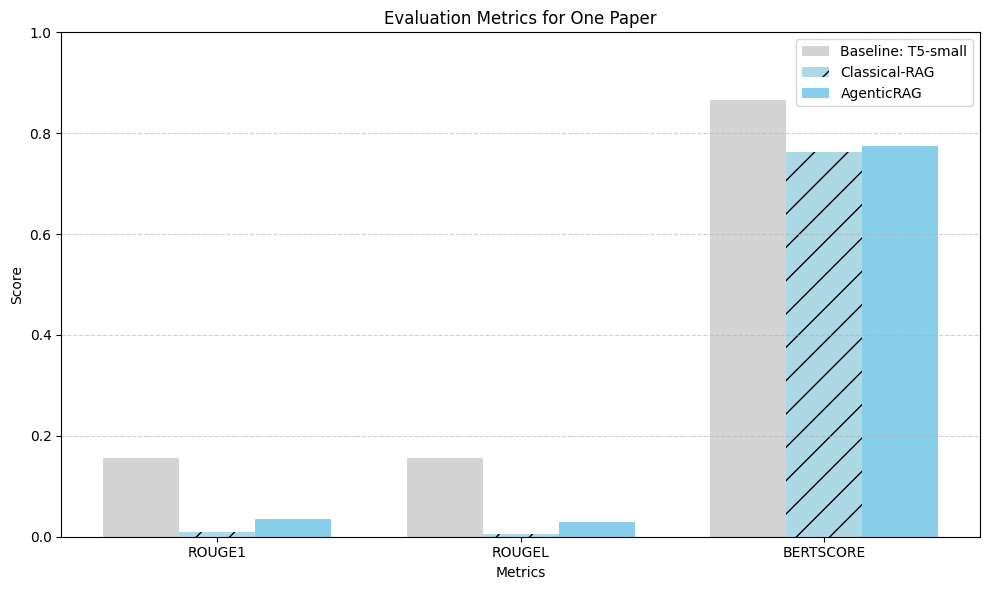

In [27]:
plot_single_file_metrics(metrics)

# Testing

In [32]:
# Testing on many queries
QUERIES = [
    "Summarize this paper in 200 words.",
    "What problem does this paper address and why is it important?",
    "Explain the main methodology used in this paper.",
    "What are the main results and contributions of this paper?"
]

def evaluate_all_queries():
    pdf_path = "/content/drive/MyDrive/Colab Notebooks/data/A Framework for Fine-Tuning LLMs using Heterogeneo.pdf"
    doc_id = os.path.basename(pdf_path)
    all_metrics = {doc_id: {}}

    for query in QUERIES:
        print(f"\n📄 Evaluating | Query: {query}")
        metrics, baseline_summary, classical_summary, agentic_summary = process_and_evaluate(pdf_path, user_query=query)

        all_metrics[doc_id][query] = {
            "Baseline": metrics["Baseline"],
            "Classical-RAG": metrics["Classical-RAG"],
            "AgenticRAG": metrics["AgenticRAG"]
        }

    return all_metrics


In [33]:


def plot_metrics_by_model_per_query(all_metrics, chunk_size=800, overlap=400):
    queries = QUERIES
    models = ["Baseline", "Classical-RAG", "AgenticRAG"]
    metrics_to_plot = ["rouge1", "rougeL", "bertscore"]

    for query in queries:
        x = np.arange(len(metrics_to_plot))  # Metrics as x-axis labels
        width = 0.25  # Width of each bar

        # Collect scores: models x metrics
        scores_matrix = []
        for model in models:
            metric_scores = []
            for metric in metrics_to_plot:
                scores = [
                    all_metrics[doc][query][model][metric]
                    for doc in all_metrics if query in all_metrics[doc]
                ]
                metric_scores.append(np.mean(scores))
            scores_matrix.append(metric_scores)

        # Plot
        plt.figure(figsize=(10, 6))
        plt.bar(x - width, scores_matrix[0], width, label="Baseline: T5-small", color="lightgray")
        plt.bar(x,         scores_matrix[1], width, label="Classical-RAG", color="lightblue", hatch='/')
        plt.bar(x + width, scores_matrix[2], width, label="AgenticRAG", color="skyblue")

        # Labels and formatting
        plt.title(f"Chunk size = {chunk_size}, Overlap = {overlap}, Query = \"{query}\"")
        plt.xticks(x, [m.upper() for m in metrics_to_plot])
        plt.ylabel("Average Score (%)")
        plt.ylim(0, 1)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.legend()
        plt.tight_layout()
        plt.show()


In [34]:


def plot_metrics_by_model_per_query_inOne(all_metrics, chunk_size=800, overlap=400):
    queries = QUERIES  # Make sure this is defined with your 4 queries
    models = ["Baseline", "Classical-RAG", "AgenticRAG"]
    metrics_to_plot = ["rouge1", "rougeL", "bertscore"]

    # Create a single figure with 4 subplots (2 rows, 2 columns)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f"Performance Comparison Across All Queries (Chunk Size = {chunk_size}, Overlap = {overlap})",
                 fontsize=14, y=1.02)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    for i, query in enumerate(queries):
        ax = axes[i]
        x = np.arange(len(metrics_to_plot))  # Metrics as x-axis labels
        width = 0.25  # Width of each bar

        # Collect scores: models x metrics
        scores_matrix = []
        for model in models:
            metric_scores = []
            for metric in metrics_to_plot:
                scores = [
                    all_metrics[doc][query][model][metric]
                    for doc in all_metrics if query in all_metrics[doc]
                ]
                metric_scores.append(np.mean(scores))
            scores_matrix.append(metric_scores)

        # Plot bars
        ax.bar(x - width, scores_matrix[0], width, label="Baseline T5-small", color="lightgray")
        ax.bar(x,         scores_matrix[1], width, label="Classical-RAG", color="lightblue", hatch='/')
        ax.bar(x + width, scores_matrix[2], width, label="AgenticRAG", color="skyblue")

        # Subplot formatting
        ax.set_title(f'Query {i+1}: {query[:20]}...' if len(query) > 20 else f'Query {i+1}: {query}')
        ax.set_xticks(x, [m.upper() for m in metrics_to_plot])
        ax.set_ylabel("Average Score (%)")
        ax.set_ylim(0, 1)
        ax.grid(axis='y', linestyle='--', alpha=0.6)

        # Only show legend on first subplot to avoid repetition
        if i == 0:
            ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

    plt.tight_layout()
    plt.show()


📄 Evaluating | Query: Summarize this paper in 200 words.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📄 Evaluating | Query: What problem does this paper address and why is it important?


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📄 Evaluating | Query: Explain the main methodology used in this paper.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📄 Evaluating | Query: What are the main results and contributions of this paper?


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


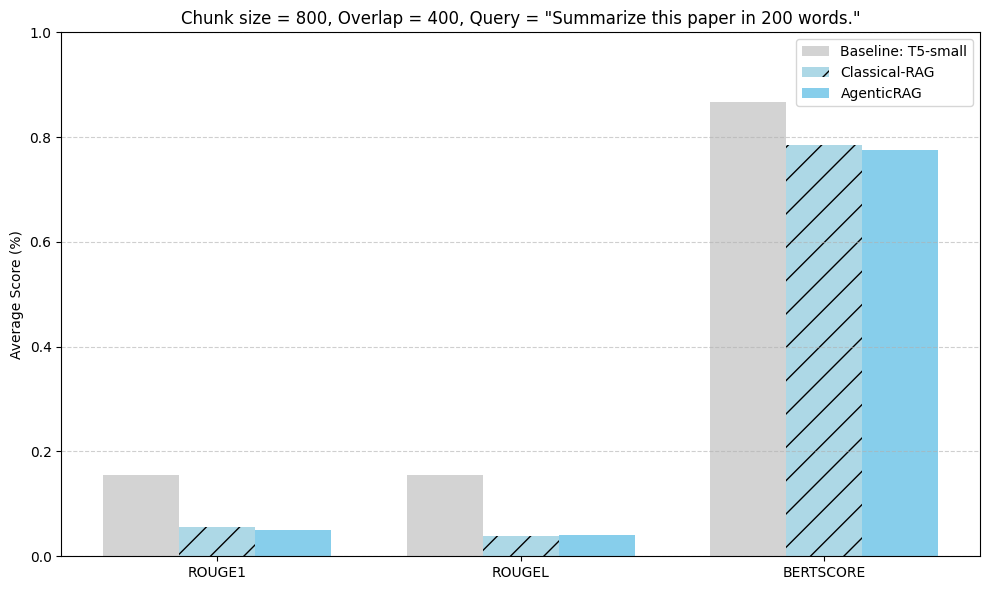

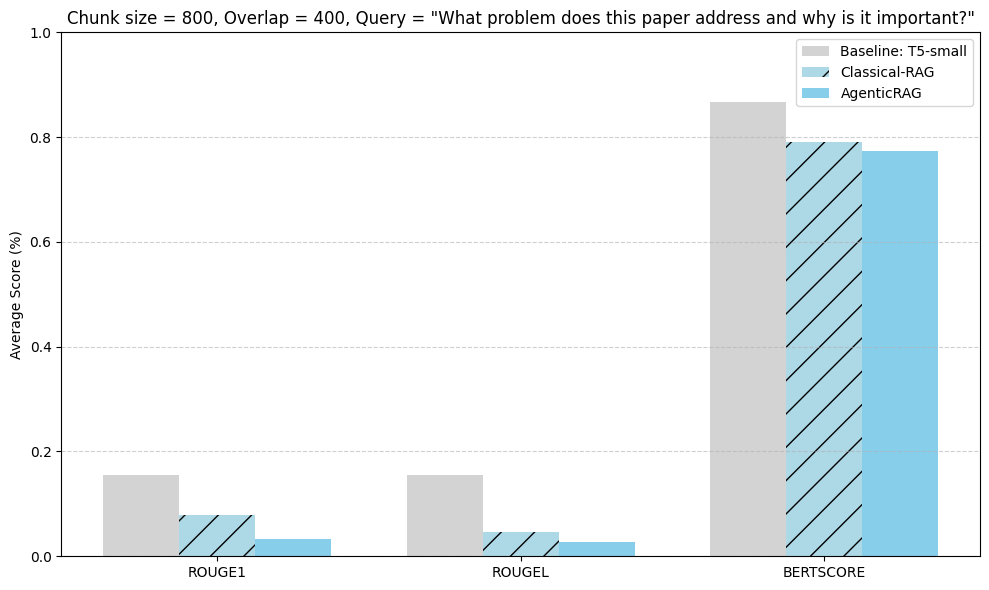

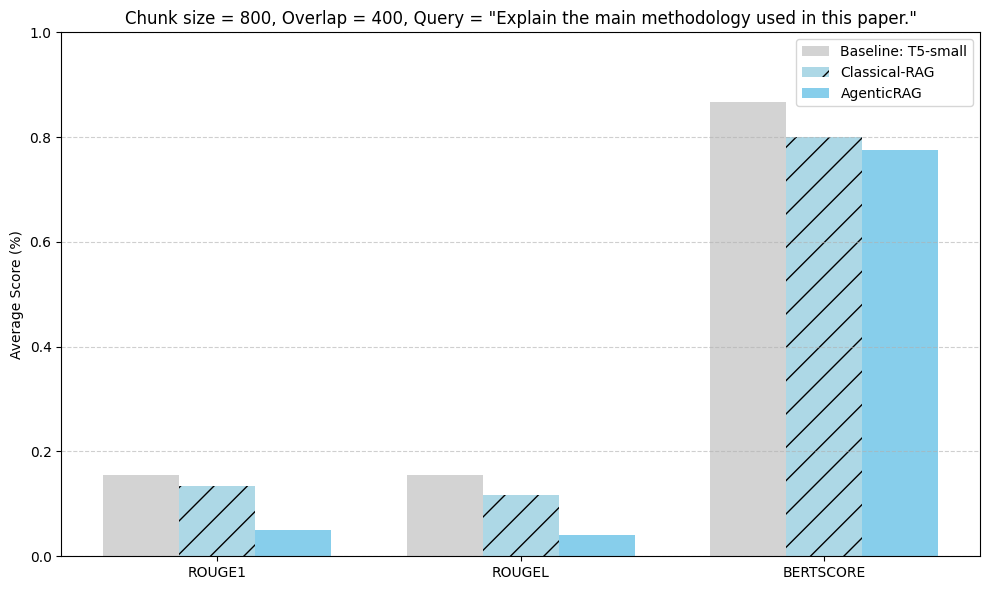

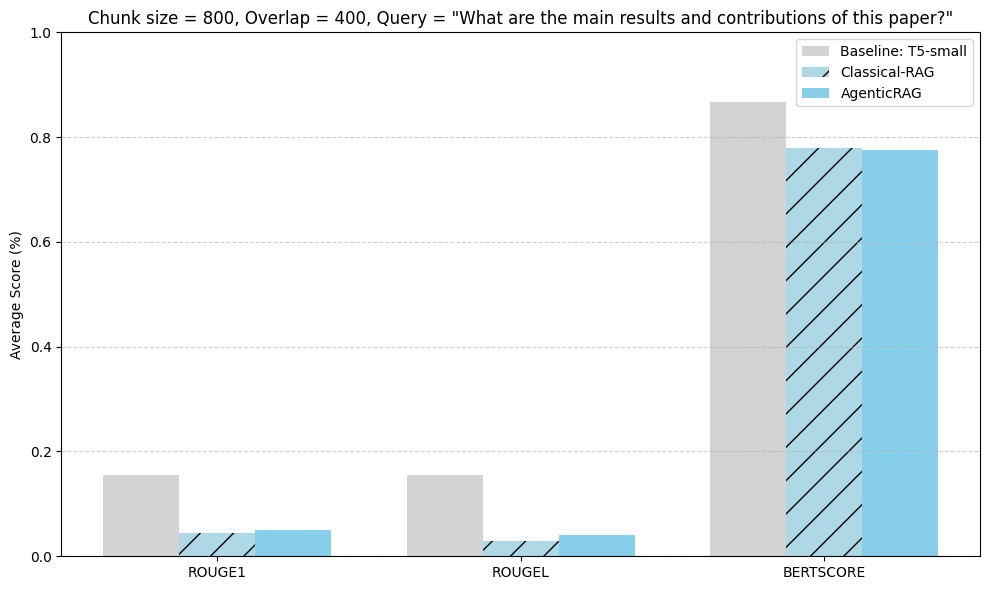

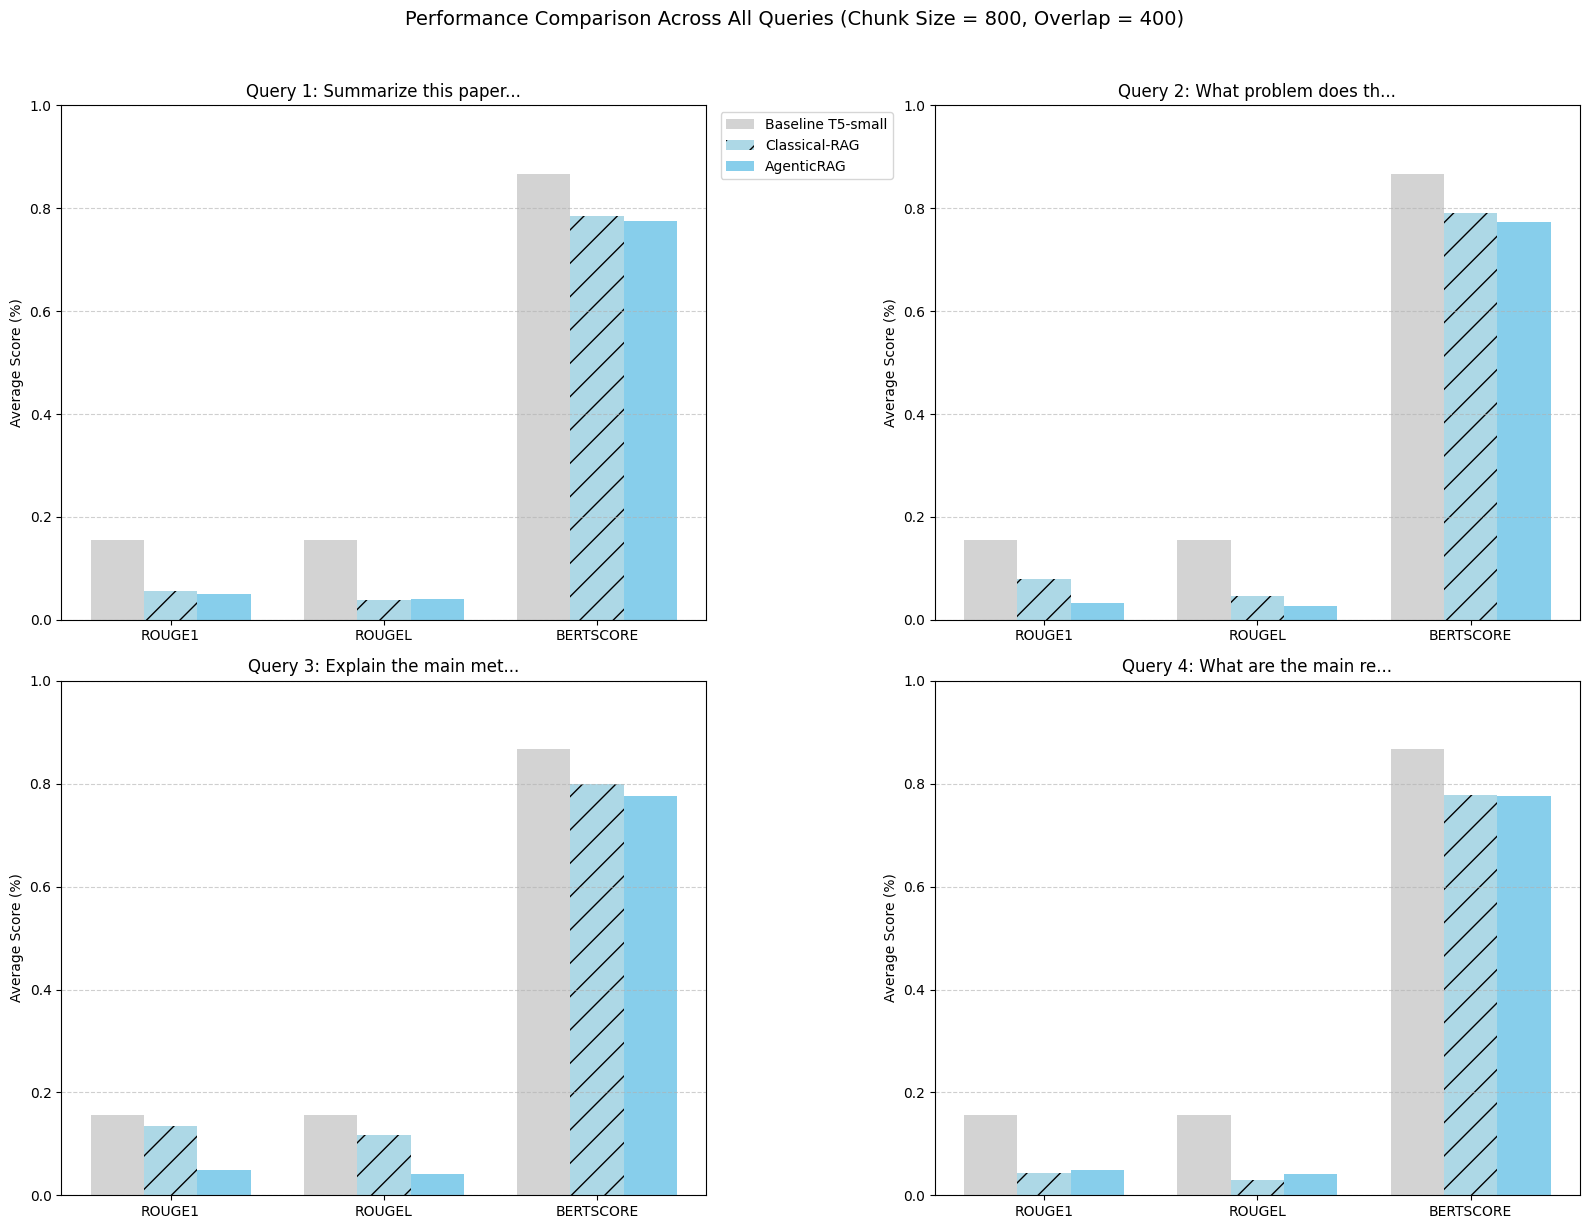

In [31]:
all_metrics = evaluate_all_queries()
plot_metrics_by_model_per_query(all_metrics)
plot_metrics_by_model_per_query_inOne(all_metrics)


## Graph RAG Pipeline